In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_line(runtimes, frameworks, path):

    all_data = []
    for runtime in runtimes:
        try:
            file_name = f'{path}/test_scores_wide_{runtime}.csv'
            df = pd.read_csv(file_name, sep=';')
            df['Runtime'] = runtime
            all_data.append(df)
        except FileNotFoundError:
            print(f"File {file_name} not found. Skipping this runtime.")
        
    all_data_df = pd.concat(all_data, ignore_index=True)
    average_auc = all_data_df.groupby('Runtime')[frameworks].median().reset_index()

    average_auc['Logistic regression'] = average_auc['Logistic regression'].iloc[4]
    average_auc['TabPFN'] = average_auc['TabPFN'].iloc[4]
    average_auc['HyperFast'].iloc[3] = average_auc['HyperFast'].iloc[4]
        
    average_auc.Runtime = average_auc.Runtime.apply(lambda x: x/60)
            
    plt.figure(figsize=(12, 8))
    for framework in frameworks:
        if framework in average_auc.columns:
            plt.plot(average_auc['Runtime'], average_auc[framework], marker='o', label=framework, markersize=14, linewidth=7)

    plt.xlabel('Runtime (min)', fontsize=26)
    plt.ylabel('Mean test AUC', fontsize=26)

    plt.xticks(ticks=range(0, 61, 5), fontsize=20)

    plt.yticks(fontsize=20)

    plt.xlim(left=0, right=61)

    plt.legend(bbox_to_anchor=(0.5, -0.13), loc='upper center', ncol=5, fontsize=13.5)

    plt.grid(True)

    plt.tight_layout()
    
    plt.savefig('./plots/runtime.pdf', bbox_inches='tight')
    plt.savefig('./plots/runtime.svg', bbox_inches='tight')

C:\Users\3aboo\AppData\Local\Temp\ipykernel_17928\1109221469.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_auc['HyperFast'].iloc[3] = average_auc['HyperFast'].iloc[4]


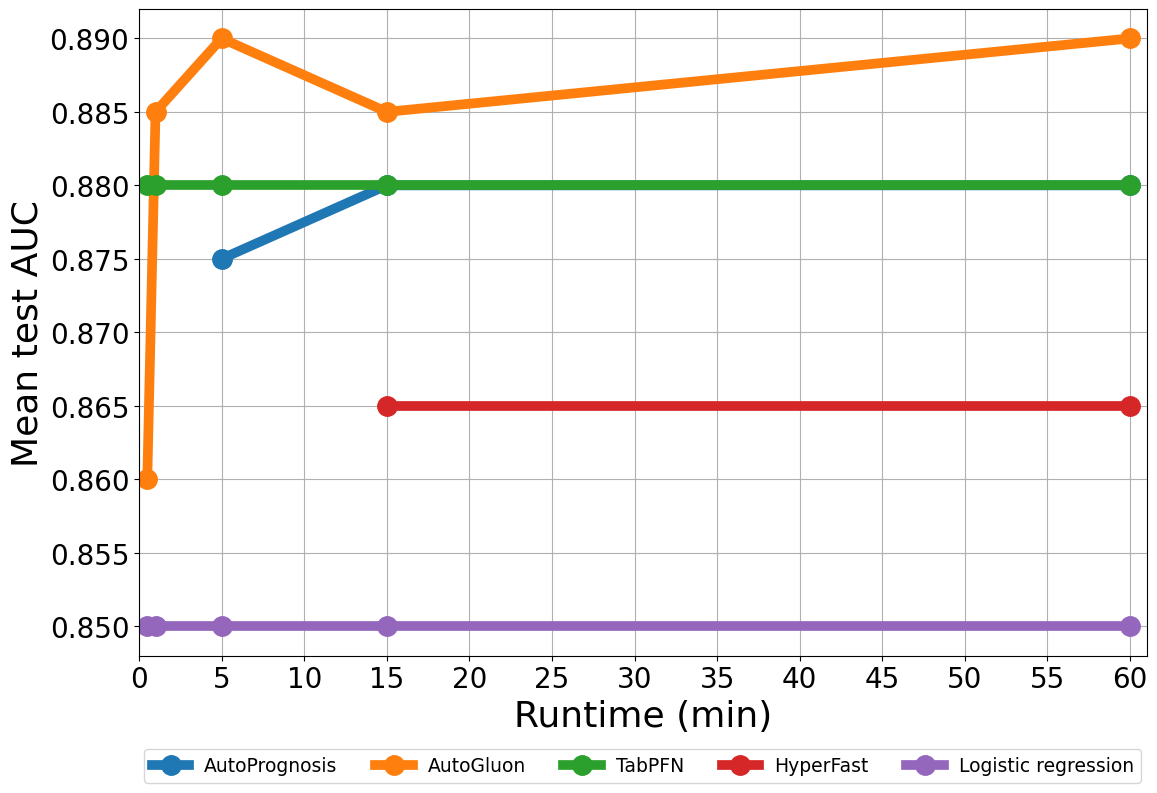

In [2]:
runtimes = [30, 60, 300, 900, 3600]
frameworks = ['AutoPrognosis', 'AutoGluon', 'TabPFN', 'HyperFast', 'Logistic regression']
path = "results"
plot_line(runtimes, frameworks, path)